In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/hr-comma-sep/HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
left = df[df.left==1]
left.shape

(3571, 10)

<Axes: xlabel='salary'>

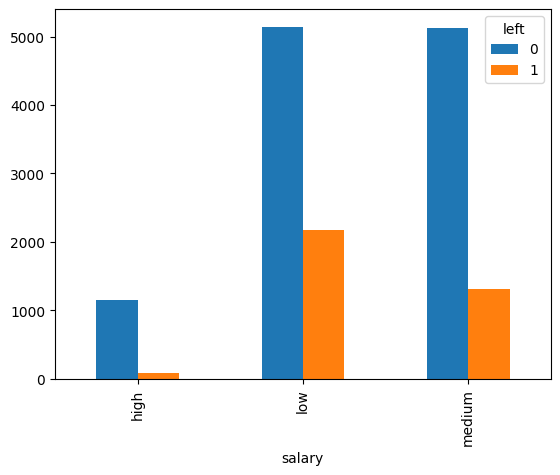

In [4]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [5]:
left = df.groupby("left").get_group(1)

In [6]:
noleft = df.groupby("left").get_group(0)

In [7]:
lastp = df.groupby("promotion_last_5years").get_group(0)
len(lastp["left"][lastp.left == 1])

3552

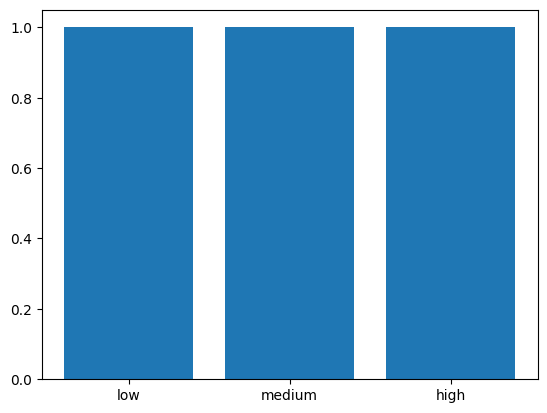

In [8]:
import numpy as np 
plt.bar(df.salary,df.left)
#plt.yticks(np.arange(0, 5000 , 1000))
plt.show()

<Axes: xlabel='Department'>

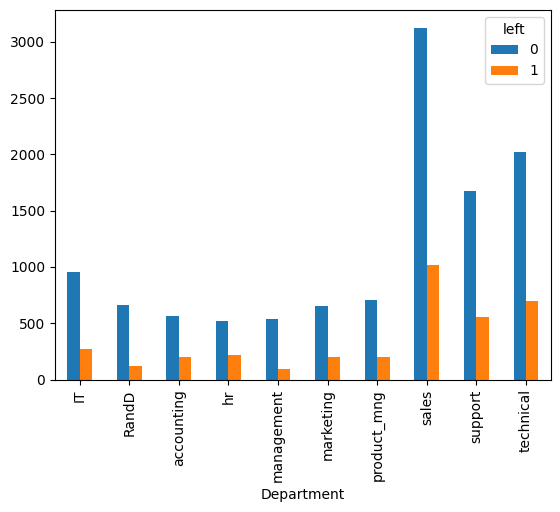

In [9]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [10]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [11]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [12]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [13]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [14]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [15]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [16]:
df.salary = df.salary.replace(to_replace=["low", "medium", "high"], value=[0 , 1, 2])
df.salary.value_counts()

salary
0    7316
1    6446
2    1237
Name: count, dtype: int64

In [17]:
y = df.left

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [19]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
10666,0.88,253,0,False,False,True
13348,0.63,192,0,True,False,False
12199,0.77,226,0,False,True,False
73,0.09,295,0,False,True,False
5109,0.62,171,0,False,False,True
...,...,...,...,...,...,...
5290,0.59,136,0,False,False,True
12540,0.45,129,0,True,False,False
4469,0.68,190,0,False,False,True
10575,0.59,230,0,False,True,False


In [20]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
13647,0.77,250,0,False,False,True
26,0.82,239,0,False,True,False
10911,0.81,153,0,False,True,False
9137,0.69,183,0,False,True,False
2266,0.55,190,0,False,True,False
...,...,...,...,...,...,...
8761,0.12,236,0,False,False,True
4159,0.90,258,0,False,False,True
14444,0.42,134,0,False,True,False
9245,0.52,198,0,False,True,False


In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [22]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
model.score(X_train,y_train)

0.7748145678806567

In [25]:
model.score(X_test,y_test)

0.773